In [106]:
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Klasifikatori

## KNN

In [107]:
#ucitavanje
train_df = pandas.read_csv('datasets/train.csv')
X_train = train_df.iloc[:, [2, 4, 5, 6, 7]].values
y_train = train_df.iloc[:, 3].values

test_df = pandas.read_csv('datasets/test.csv')
X_test = test_df.iloc[:, [2, 4, 5, 6, 7]].values
y_test = test_df.iloc[:, 3].values

validation_df = pandas.read_csv('datasets/validation.csv')
X_validation = validation_df.iloc[:, [2, 4, 5, 6, 7]].values
y_validation = validation_df.iloc[:, 3].values

#normalizacija
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

#optimizacija k
min_error = float('inf')
k = 1
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_validation)
    error = np.mean(pred_i != y_validation)
    if error < min_error:
        min_error = error
        k = i
    
print('k: ' + str(k))

#treniranje
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

#predikcija
y_pred = knn.predict(X_test)

k: 30


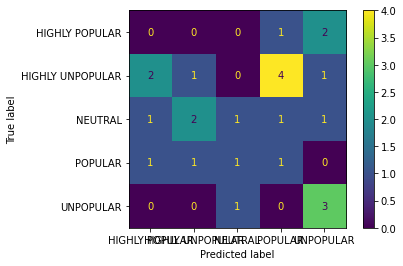

In [108]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rfc.classes_
)
disp.plot()
plt.show()

In [109]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  HIGHLY POPULAR       0.00      0.00      0.00         3
HIGHLY UNPOPULAR       0.25      0.12      0.17         8
         NEUTRAL       0.33      0.17      0.22         6
         POPULAR       0.14      0.25      0.18         4
       UNPOPULAR       0.43      0.75      0.55         4

        accuracy                           0.24        25
       macro avg       0.23      0.26      0.22        25
    weighted avg       0.25      0.24      0.22        25



## Logistic Regression

In [110]:
#ucitavanje
train_df = pandas.read_csv('datasets/train.csv')
X_train = train_df.iloc[:, [2, 4, 5, 6, 7]].values
y_train = train_df.iloc[:, 3].values

test_df = pandas.read_csv('datasets/test.csv')
X_test = test_df.iloc[:, [2, 4, 5, 6, 7]].values
y_test = test_df.iloc[:, 3].values

validation_df = pandas.read_csv('datasets/validation.csv')
X_validation = validation_df.iloc[:, [2, 4, 5, 6, 7]].values
y_validation = validation_df.iloc[:, 3].values

#normalizacija
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

#traniranje
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

#predikcija
y_pred = lr.predict(X_test)

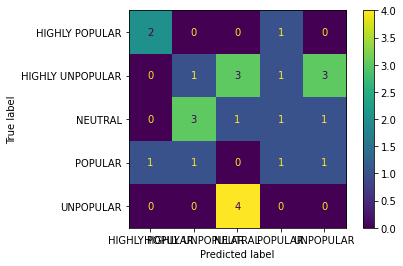

In [111]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rfc.classes_
)
disp.plot()
plt.show()

In [112]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  HIGHLY POPULAR       0.67      0.67      0.67         3
HIGHLY UNPOPULAR       0.20      0.12      0.15         8
         NEUTRAL       0.12      0.17      0.14         6
         POPULAR       0.25      0.25      0.25         4
       UNPOPULAR       0.00      0.00      0.00         4

        accuracy                           0.20        25
       macro avg       0.25      0.24      0.24        25
    weighted avg       0.21      0.20      0.20        25



## Support Vector Classification

In [113]:
#ucitavanje
train_df = pandas.read_csv('datasets/train.csv')
X_train = train_df.iloc[:, [2, 4, 5, 6, 7]].values
y_train = train_df.iloc[:, 3].values

test_df = pandas.read_csv('datasets/test.csv')
X_test = test_df.iloc[:, [2, 4, 5, 6, 7]].values
y_test = test_df.iloc[:, 3].values

validation_df = pandas.read_csv('datasets/validation.csv')
X_validation = validation_df.iloc[:, [2, 4, 5, 6, 7]].values
y_validation = validation_df.iloc[:, 3].values

#normalizacija
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

#treniranje
svc = SVC(gamma='auto').fit(X_train, y_train)

#predikcija
y_pred = svc.predict(X_test)

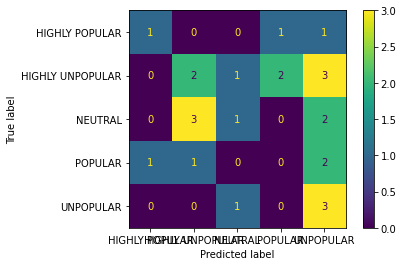

In [114]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rfc.classes_
)
disp.plot()
plt.show()

In [115]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  HIGHLY POPULAR       0.50      0.33      0.40         3
HIGHLY UNPOPULAR       0.33      0.25      0.29         8
         NEUTRAL       0.33      0.17      0.22         6
         POPULAR       0.00      0.00      0.00         4
       UNPOPULAR       0.27      0.75      0.40         4

        accuracy                           0.28        25
       macro avg       0.29      0.30      0.26        25
    weighted avg       0.29      0.28      0.26        25



## Naive Bayes

In [116]:
#ucitavanje
train_df = pandas.read_csv('datasets/train.csv')
X_train = train_df.iloc[:, [2, 4, 5, 6, 7]].values
y_train = train_df.iloc[:, 3].values

test_df = pandas.read_csv('datasets/test.csv')
X_test = test_df.iloc[:, [2, 4, 5, 6, 7]].values
y_test = test_df.iloc[:, 3].values

validation_df = pandas.read_csv('datasets/validation.csv')
X_validation = validation_df.iloc[:, [2, 4, 5, 6, 7]].values
y_validation = validation_df.iloc[:, 3].values

#normalizacija
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

#treniranje
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#predikcija
y_pred = gnb.predict(X_test)

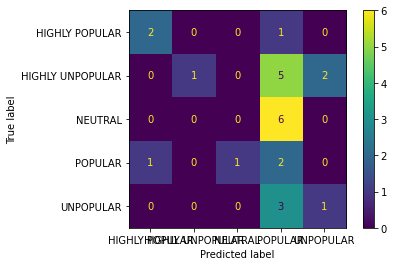

In [117]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rfc.classes_
)
disp.plot()
plt.show()

In [118]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  HIGHLY POPULAR       0.67      0.67      0.67         3
HIGHLY UNPOPULAR       1.00      0.12      0.22         8
         NEUTRAL       0.00      0.00      0.00         6
         POPULAR       0.12      0.50      0.19         4
       UNPOPULAR       0.33      0.25      0.29         4

        accuracy                           0.24        25
       macro avg       0.42      0.31      0.27        25
    weighted avg       0.47      0.24      0.23        25



## Decision Tree

In [126]:
#ucitavanje
train_df = pandas.read_csv('datasets/train.csv')
X_train = train_df.iloc[:, [2, 4, 5, 6, 7]].values
y_train = train_df.iloc[:, 3].values

test_df = pandas.read_csv('datasets/test.csv')
X_test = test_df.iloc[:, [2, 4, 5, 6, 7]].values
y_test = test_df.iloc[:, 3].values

validation_df = pandas.read_csv('datasets/validation.csv')
X_validation = validation_df.iloc[:, [2, 4, 5, 6, 7]].values
y_validation = validation_df.iloc[:, 3].values

#normalizacija
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

#treniranje
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#predikcija
y_pred = dtc.predict(X_test)

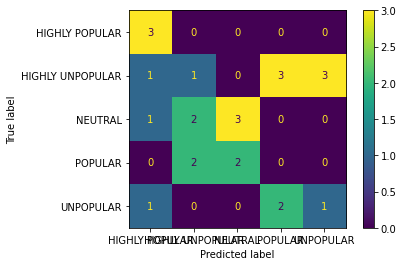

In [127]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rfc.classes_
)
disp.plot()
plt.show()

In [128]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  HIGHLY POPULAR       0.50      1.00      0.67         3
HIGHLY UNPOPULAR       0.20      0.12      0.15         8
         NEUTRAL       0.60      0.50      0.55         6
         POPULAR       0.00      0.00      0.00         4
       UNPOPULAR       0.25      0.25      0.25         4

        accuracy                           0.32        25
       macro avg       0.31      0.38      0.32        25
    weighted avg       0.31      0.32      0.30        25



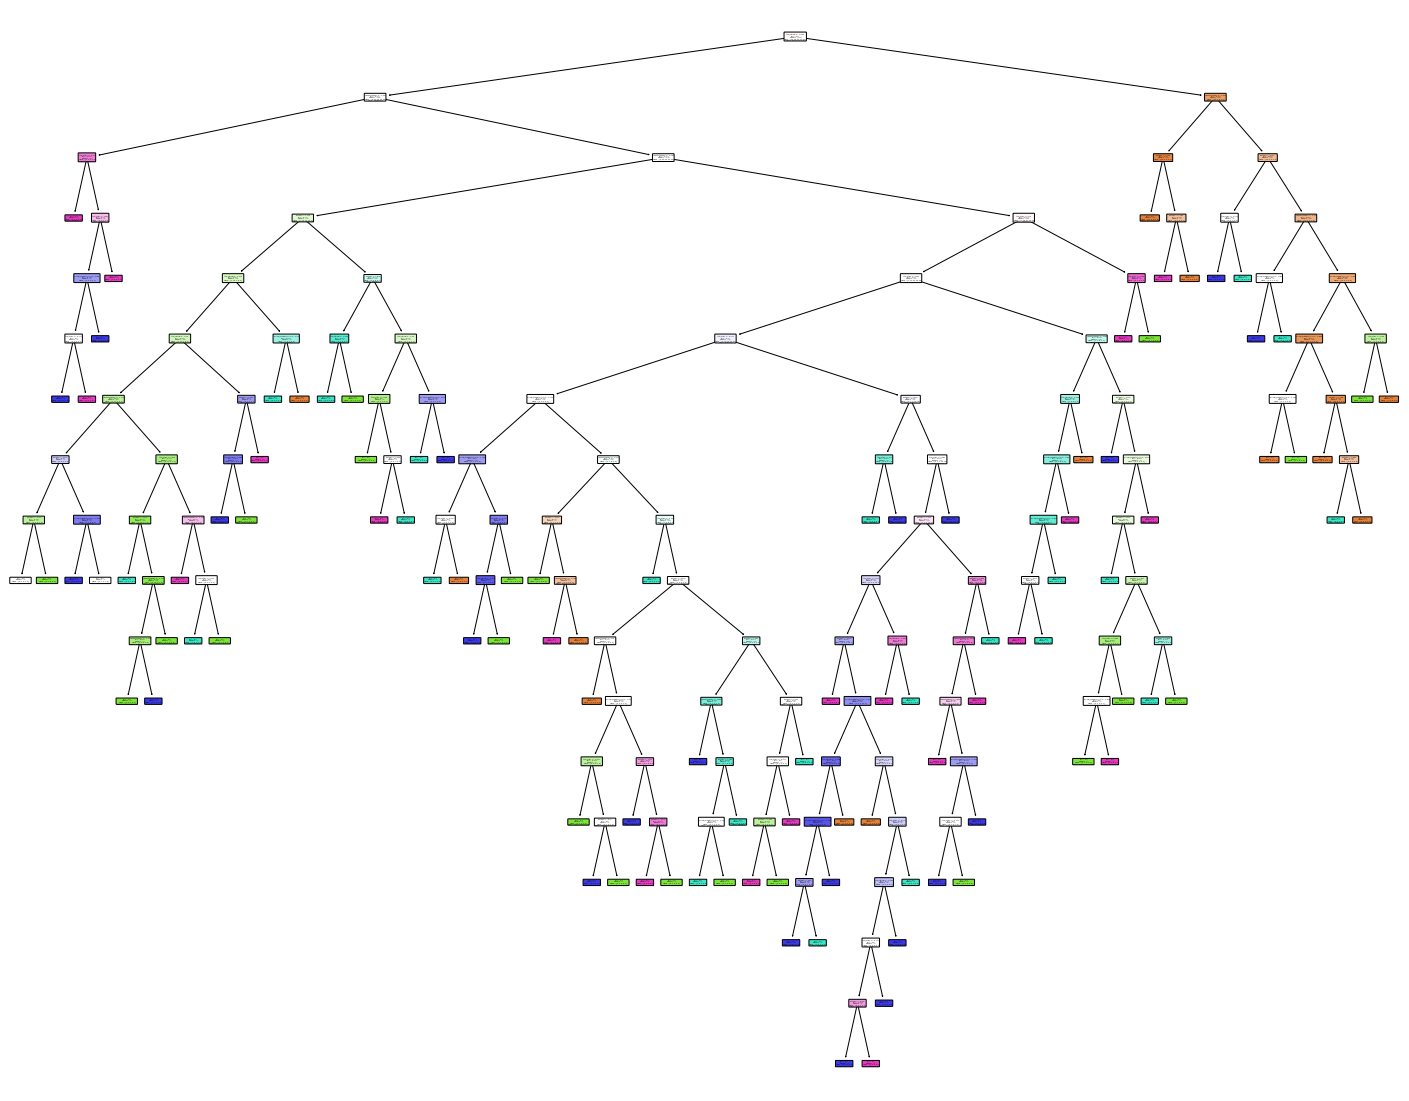

In [130]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=['total_ratings', 'median_property_price', 'total_stops', 'competitiveness', 'entropy'],  
                   class_names=dtc.classes_,
                   filled=True, rounded = True, proportion = False)

## Random Forest Classifier

In [123]:
#ucitavanje
train_df = pandas.read_csv('datasets/train.csv')
X_train = train_df.iloc[:, [2, 4, 5, 6, 7]].values
y_train = train_df.iloc[:, 3].values

test_df = pandas.read_csv('datasets/test.csv')
X_test = test_df.iloc[:, [2, 4, 5, 6, 7]].values
y_test = test_df.iloc[:, 3].values

validation_df = pandas.read_csv('datasets/validation.csv')
X_validation = validation_df.iloc[:, [2, 4, 5, 6, 7]].values
y_validation = validation_df.iloc[:, 3].values

#normalizacija
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

#optimizacija n_estimators i max_depth i max_features
# n_estimators = 1
# max_depth = 1
# max_features = 1
# min_error = float('inf')
# for i in range(5, 50): #estimators
#     for j in range(5, 20): #max depth
#         for k in range(1, 5): #max features
#             rfc = RandomForestClassifier(n_estimators=i, max_depth=j, max_features=k)
#             rfc.fit(X_train, y_train)
#             pred_i = rfc.predict(X_validation)
#             error = np.mean(pred_i != y_validation)
#             if error < min_error:
#                 min_error = error
#                 n_estimators = i
#                 max_depth = j
#                 max_features = k

# print('estimators: ' + str(n_estimators))
# print('max depth: ' + str(max_depth))
# print('max features: ' + str(max_features))

#treniranje
# rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#predikcija
y_pred = rfc.predict(X_test)

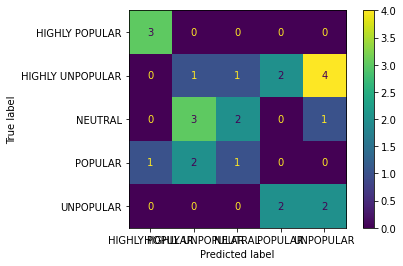

In [124]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rfc.classes_
)
disp.plot()
plt.show()

In [125]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

  HIGHLY POPULAR       0.75      1.00      0.86         3
HIGHLY UNPOPULAR       0.17      0.12      0.14         8
         NEUTRAL       0.50      0.33      0.40         6
         POPULAR       0.00      0.00      0.00         4
       UNPOPULAR       0.29      0.50      0.36         4

        accuracy                           0.32        25
       macro avg       0.34      0.39      0.35        25
    weighted avg       0.31      0.32      0.30        25



# Kontrolna tacka 2 - Plan

1. Dodati Jensen Quality atribut
2. Optimizovati hiperparametre klasifikatora
3. Povecati dataset
4. Omoguciti da svaki objekat moze imati vise kategorija